In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [3]:
df=pd.read_csv("/content/experience_salary.csv")

In [4]:
df.columns

Index(['Experience Years', 'Salary'], dtype='object')

In [6]:
df["experience"]=df["Experience Years"]

In [19]:
df["salary"]=df["Salary"]

In [8]:
df.drop(["Experience Years"],axis=True,inplace=True)

In [20]:
df.drop("Salary",axis=1,inplace=True)

In [9]:
df.columns

Index(['Salary', 'experience'], dtype='object')

In [10]:
df.shape

(40, 2)

In [11]:
df.size

80

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Salary      40 non-null     int64  
 1   experience  40 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 772.0 bytes


In [13]:
 df.describe()

,Salary,experience
count,40.000000,40.000000
mean,74743.625000,5.152500
std,25947.122885,2.663715
min,37731.000000,1.100000
25%,56878.250000,3.200000
50%,64472.500000,4.600000
75%,95023.250000,6.875000
max,122391.000000,10.500000


In [14]:
df.head()

,Salary,experience
0,39343,1.1
1,42774,1.2
2,46205,1.3
3,37731,1.5
4,43525,2.0


In [15]:
df.corr()

,Salary,experience
Salary,1.000000,0.977692
experience,0.977692,1.000000


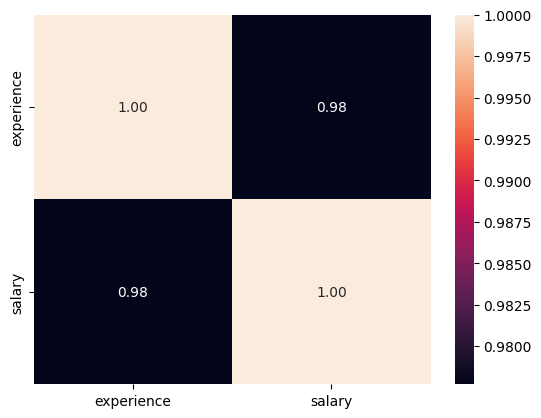

In [25]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

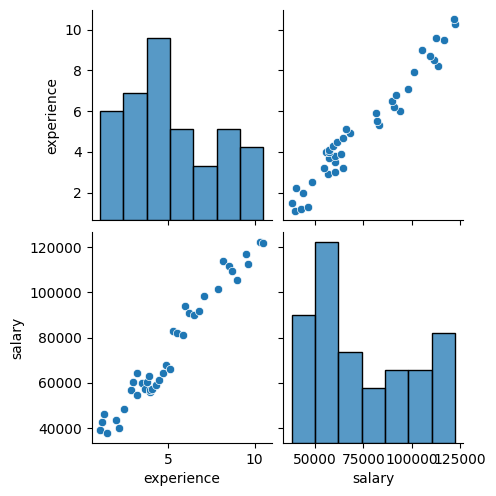

In [23]:
sns.pairplot(df)
plt.show()

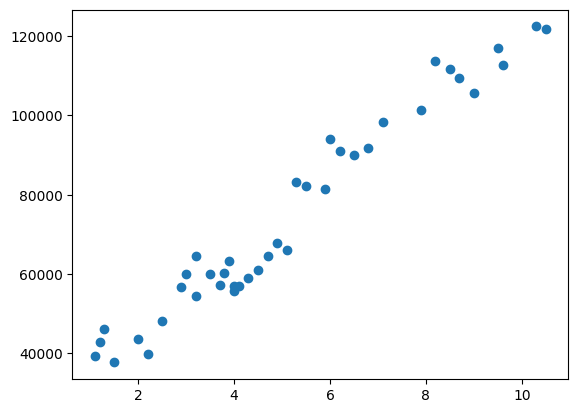

In [22]:
plt.scatter(x=df["experience"],y=df["salary"])
plt.show()

In [27]:
# independent should be in dataframe or 2D array
x=df[["experience"]]
np.array(x).shape

(40, 1)

In [29]:
x_series=df["experience"]
np.array(x_series).shape

(40,)

In [30]:
# dependent should be in series or 1D array
y=df["salary"]
print(type(y))

<class 'pandas.core.series.Series'>


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
scaler=StandardScaler()

In [36]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [37]:
model=LinearRegression()

In [51]:
# the below code will produce error
# model.fit(x_series,y_train)

In [39]:
model.fit(x_train,y_train)

LinearRegression()

In [41]:
beta1=model.coef_
beta1

array([25762.11977638])

In [42]:
beta0=model.intercept_
beta0

np.float64(75549.8125)

In [43]:
# y = beta0 + beta1 * x

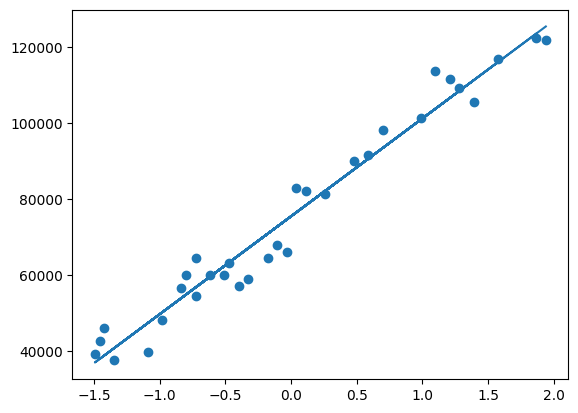

In [44]:
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train))
plt.show()

In [45]:
y_pred=model.predict(x_test)

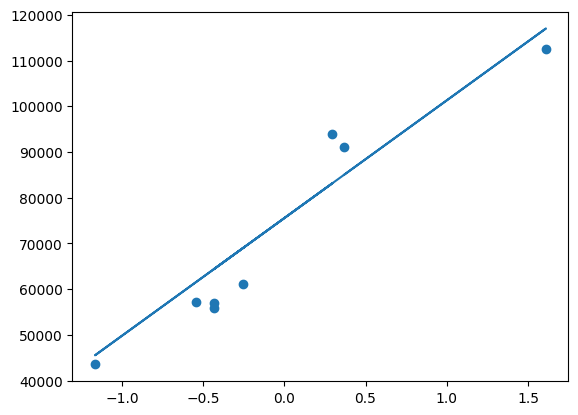

In [46]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)
plt.show()

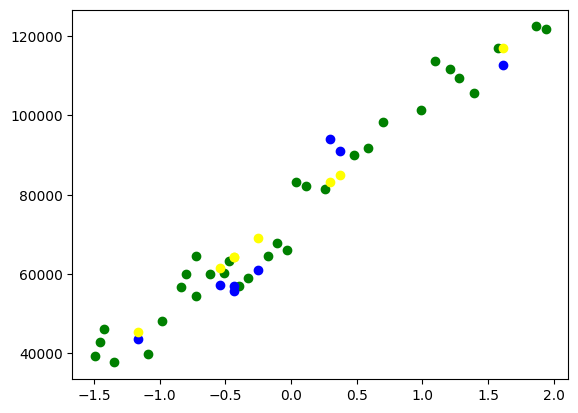

In [48]:
plt.scatter(x_train,y_train,color="green")
plt.scatter(x_test,y_test,color="blue")
plt.scatter(x_test,y_pred,color="yellow")
# plt.plot(x_train,model.predict(x_train),color="red")
plt.show()

In [49]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [50]:
print(mse)
print(mae)
print(rmse)
print(r2)

48077731.1691936
6419.911069460599
6933.810724932835
0.9068577573647872


In [54]:
# adjusted r2-score
adj_r2=1-(1-r2)*(len(x_test)-1)/(len(x_test)-x_test.shape[1]-1)
print(adj_r2)

0.8913340502589184


In [56]:
from statsmodels.api import OLS

In [59]:
model1=OLS(y_train,x_train).fit()

In [60]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.104
Model:                            OLS   Adj. R-squared (uncentered):              0.075
Method:                 Least Squares   F-statistic:                              3.589
Date:                Fri, 27 Jun 2025   Prob (F-statistic):                      0.0675
Time:                        05:28:29   Log-Likelihood:                         -404.92
No. Observations:                  32   AIC:                                      811.8
Df Residuals:                      31   BIC:                                      813.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.576e+04   1.36e+04      1.895      0.068   -1971.783    5.35e+04
==============================================================================
Omnibus:                        1.288   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.525   Jarque-Bera (JB):                0.936
Skew:                          -0.049   Prob(JB):                        0.626
Kurtosis:                       2.168   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
y_pred1=model1.predict(x_test)

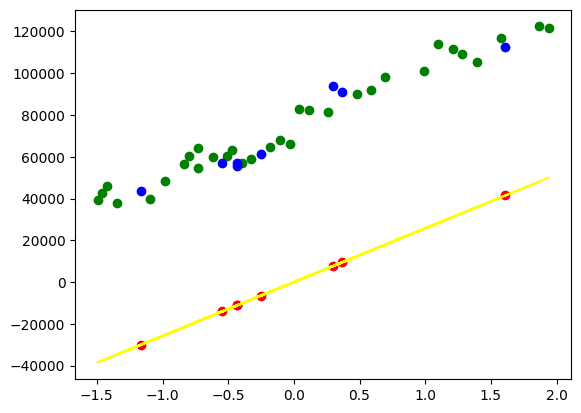

In [64]:
plt.scatter(x_train,y_train,color="green")
plt.scatter(x_test,y_test,color="blue")
plt.scatter(x_test,y_pred1,color="red")
plt.plot(x_train,model1.predict(x_train),color="yellow")
plt.show()

In [63]:
# in above case the OLS is not  working well